In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

import umap


/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the Iris dataset

iris = load_iris()

X = iris.data

y = iris.target

target_names = iris.target_names

In [3]:
# Scale the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [4]:
# Supervised UMAP

umap_superised = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components =2, random_state=42, metric='euclidean')

X_umap_supervised = umap_superised.fit_transform(X_scaled, y)

/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


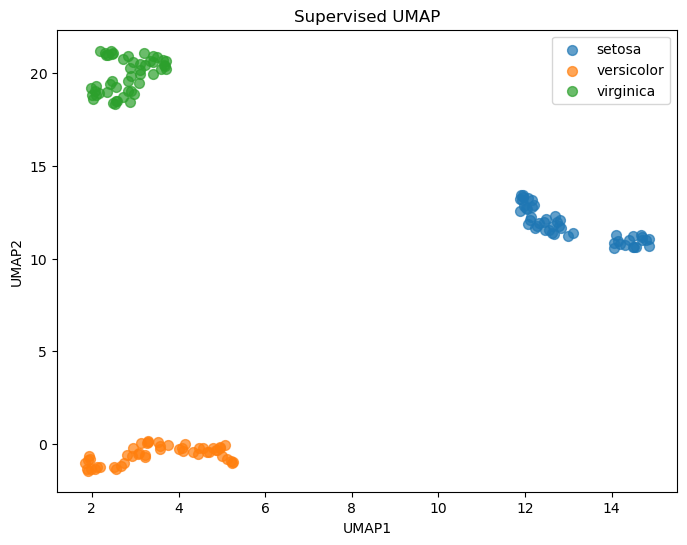

In [5]:
# Plotting


plt.figure(figsize=(8,6))

for i , target_name in enumerate(target_names):
   
   plt.scatter(
      
      X_umap_supervised[y == i, 0], X_umap_supervised[y == i, 1],
      label=target_name, s=50, alpha=0.7
      
   )

plt.title("Supervised UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()

/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


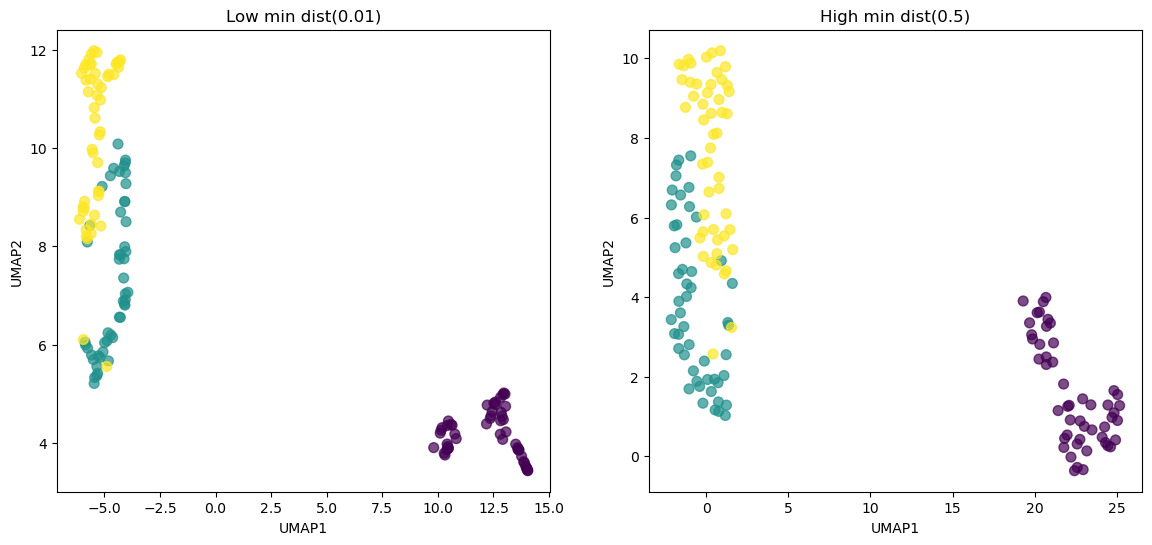

In [6]:
# Low min_dist

umap_low_min_dist = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=2, random_state=42)

X_umap_low = umap_low_min_dist.fit_transform(X_scaled)


# High min_dist
umap_high_min_dist = umap.UMAP(n_neighbors=15, min_dist=0.5, n_components=2, random_state=42)

X_umap_high = umap_high_min_dist.fit_transform(X_scaled)

# Plotting

fig, axes = plt.subplots(1,2, figsize = (14,6))
axes[0].scatter(X_umap_low[:,0], X_umap_low[:,1], c=y, cmap='viridis', s=50, alpha=0.7)

axes[0].set_title("Low min dist(0.01)")

axes[0].set_xlabel("UMAP1")

axes[0].set_ylabel("UMAP2")


axes[1].scatter(X_umap_high[:,0], X_umap_high[:,1], c=y, cmap='viridis', s=50, alpha=0.7)

axes[1].set_title("High min dist(0.5)")

axes[1].set_xlabel("UMAP1")

axes[1].set_ylabel("UMAP2")

plt.show()